In [1]:
from custom_functions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
def f1(x_arr, b, g):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z

    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])


def df(x):
    h = 1e-06
    J = MyJacobian(function_being_used, x, h)
    if J.ndim > 2:
        J = J.squeeze(axis=2)
    return J

def function_for_IVP(t, x):
    b = 1
    g = -1
    return f1(x, b, g)

## Eqlib points for g = -1, b = 1 is (1.4108, 0.2439)

## Now to track the euqlib, 
need to set up a RHS

## userf1 is without extra dims

In [ ]:
def userf1(x_arr):
    #g is included in x_arr
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z, x_arr[2] = g
    b = 1
    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-x_arr[2]*x_arr[0])

    return np.array([dxdt, dzdt])

def userdf1(x):
    h = 1e-06
    J = MyJacobian(userf, x, h)
    if J.ndim > 2:
        J = J.squeeze(axis=2)
    return J

In [11]:
def userf1(t, x_arr, p):
    '''2D ODE system for the AMOC
    Input
    t  : float
        time value
    x  : array (2, N)
        state space values
    p  : array (2,)
        parameter values
    
    
    Returns
    xout: array, shape (2, N)
           Array containing derivative at x
           2nd dimension denotes derivatives for different points
    '''
    
    if x_arr.ndim == 1:
        x_arr = np.expand_dims(x_arr, axis=1)
    
    n = x_arr.shape
    xout = np.empty(n)
    xout[:] = np.nan 

    b = p[0,]
    g = p[1,]
    
    
    b = 1
    xout[0,:] = x_arr[0, :] - (x_arr[0, :]**2)*np.exp(-b*x_arr[0, :]*x_arr[1, :])
    xout[1,:] = x_arr[1, :] - (x_arr[1, :]**2)*np.exp(-g*x_arr[0, :])
    return xout

# Find Eq with b = 1, g = -1

[1.41080616 0.24394654]


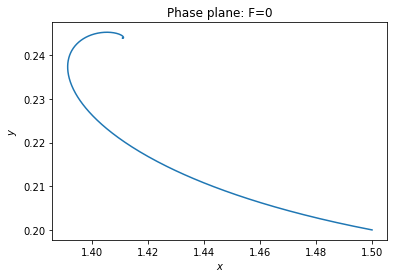

In [14]:
# Define parameters p
b = 1
g = -1
p = np.array([b, g])

#define variable to go into MyIVP
x0 = np.array([1.5,0.2])
tspan = [0,100]
h = 0.01

#call MyIVP
[X,t,xeq1] = MyIVP(lambda t,x:userf1(t,x,p),x0,tspan,h)
X = np.squeeze(X)
xeq1 = np.squeeze(xeq1)
print(xeq1)

#Plot
plt.plot(X[0,:],X[1,:])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Phase plane: F=0")

plt.show()

# Now Track the Equilibria

In [19]:
# Define RHS for tracking equilibria
RHS = lambda y: userf1(0,y[0:2,:],np.array([b, y[2,:]]))

h=1e-6
df= lambda y: np.squeeze(MyJacobian(RHS,y,h),axis=2)

# Define MyTrackCurve initial points, MAKE GUESS OF Y TANGENT
y0 = np.append(xeq1,np.array([g]),axis=0);
ytan0 = np.expand_dims(np.array([0,0,1]),axis=1); # guess in the direction of increasing F

# Solve for the true initial tangent
df0 = df(y0)
zeros0 = np.zeros((2,))
zeros1 = np.append(zeros0,np.array([1.]),axis=0)
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult

ylist1 = MyTrackCurve(RHS,df,y0,ytan,nmax=1000,stepsize=0.005)


#NOW OTHER DIRECTION
# guess in direction for decreasing F
ytan0 = np.expand_dims(np.array([0,0,-1]),axis=1)

# Solve for the true initial tangent
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult

ylist2 = MyTrackCurve(RHS,df,y0,ytan,nmax=1000,stepsize=0.005)

C:\Users\aaron\AppData\Local\Temp\ipykernel_38628\2751528741.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  RHS = lambda y: userf1(0,y[0:2,:],np.array([b, y[2,:]]))


Error is 1.00365e-05, Residual is 6.65861e-06
Error is 8.26618e-11, Residual is 4.92731e-11
Error is 1.0102e-05, Residual is 6.71133e-06
Error is 8.32081e-11, Residual is 4.94835e-11
Error is 1.01672e-05, Residual is 6.76424e-06
Error is 8.37506e-11, Residual is 4.96991e-11
Error is 1.02322e-05, Residual is 6.81731e-06
Error is 8.42875e-11, Residual is 4.99196e-11
Error is 1.02968e-05, Residual is 6.87054e-06
Error is 8.4818e-11, Residual is 5.01451e-11
Error is 1.0361e-05, Residual is 6.92392e-06
Error is 8.53443e-11, Residual is 5.03774e-11
Error is 1.04249e-05, Residual is 6.97743e-06
Error is 8.58629e-11, Residual is 5.06152e-11
Error is 1.04883e-05, Residual is 7.03107e-06
Error is 8.6375e-11, Residual is 5.08597e-11
Error is 1.05513e-05, Residual is 7.08482e-06
Error is 8.68792e-11, Residual is 5.11108e-11
Error is 1.06138e-05, Residual is 7.13866e-06
Error is 8.73766e-11, Residual is 5.13697e-11
Error is 1.06758e-05, Residual is 7.1926e-06
Error is 8.78651e-11, Residual is 5.163

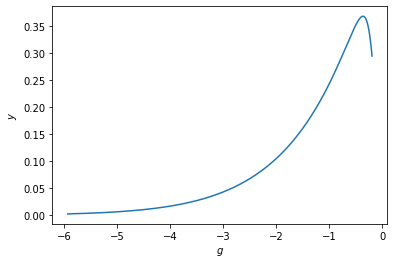

In [22]:
ylist = np.concatenate((np.flip(ylist2,1),ylist1),axis=1);

plt.plot(ylist[2,:],ylist[1,:])
plt.xlabel("$g$")
plt.ylabel("$y$")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


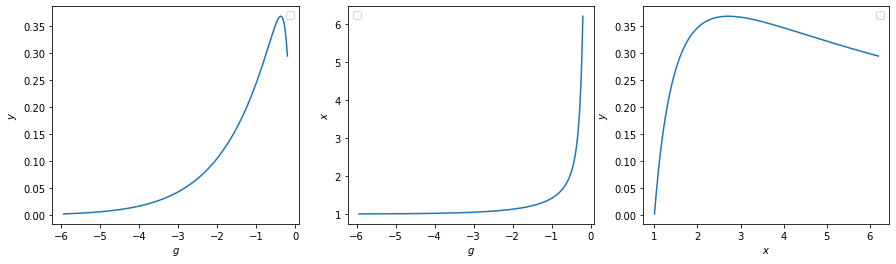

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

ax1 = axs[0]
ax1.plot(ylist[2,:],ylist[1,:], label = '')
ax1.set_xlabel("$g$")
ax1.set_ylabel("$y$")
ax1.legend()
ax1.set_title("")

ax2 = axs[1]
ax2.plot(ylist[2,:], ylist[0,:], label = '')
ax2.set_xlabel("$g$")
ax2.set_ylabel("$x$")
ax2.legend()
ax2.set_title("")

ax3 = axs[2]
ax3.plot(ylist[0,:], ylist[1,:], label = '')
ax3.set_xlabel("$x$")
ax3.set_ylabel("$y$")
ax3.legend()
ax3.set_title("")

#ax4 = axs[1, 1]

plt.show()